In [1]:
f30 <- read.csv('data/WHI/Medical History/f30_ctos_inv/f30_ctos_inv.dat',
               sep='\t', header=T)

In [2]:
dim(f30)

[1] 161701    113

In [8]:
library(dplyr)
glaucoma.data <- f30 %>%
    select(ID, GLAUCOMA)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [9]:
MRI.abnormal <- read.csv('data/MRI1_abnormalvol.csv', header=T, stringsAsFactor=F)
abnormal.sum <- apply(MRI.abnormal[,-1], 1, sum)
MRI.regional <- read.csv('data/MRI1_totalvol.csv', header=T, stringsAsFactor=F)
regional.sum <- apply(MRI.regional[,-c(1, dim(MRI.regional)[2])], 1, sum)
MRI.abnormal <- cbind(MRI.abnormal, abnormal.sum)
MRI.regional <- cbind(MRI.regional, regional.sum)

In [24]:
data.merged <- left_join(MRI.regional, MRI.abnormal, by=c('id')) %>%
    inner_join(glaucoma.data, by=c('id'='ID')) %>%
    filter(!is.na(GLAUCOMA))

In [25]:
dim(data.merged)

[1] 1376  193

In [13]:
unique(data.merged$GLAUCOMA)

[1]  0 NA  1

In [26]:
sum(data.merged$GLAUCOMA==0, na.rm = T)

[1] 1286

In [27]:
sum(data.merged$GLAUCOMA==1, na.rm = T)

[1] 90

## Linear regression on the regional and abnormal 
- ratio between sum of abnormal regions and icv

In [68]:
occipital <- sapply(attributes(data.merged)$names, function(x) grepl(pattern='occipital', x))

In [70]:
which(occipital)

inferior_occipital_gyrus_left.x superior_occipital_gyrus_right.x 
                              33                               34 
       occipital_lobe_WM_right.x   middle_occipital_gyrus_right.x 
                              38                               49 
        occipital_lobe_WM_left.x inferior_occipital_gyrus_right.x 
                              54                               67 
 superior_occipital_gyrus_left.x             occipital_pole_right 
                              68                               83 
   middle_occipital_gyrus_left.x            occipital_pole_left.x 
                              88                               94 
 inferior_occipital_gyrus_left.y superior_occipital_gyrus_right.y 
                             129                              130 
       occipital_lobe_WM_right.y   middle_occipital_gyrus_right.y 
                             134                              145 
        occipital_lobe_WM_left.y inferior_occipital_gyrus_right.y 
                             150                              163 
 superior_occipital_gyrus_left.y    middle_occipital_gyrus_left.y 
                             164                              184 
           occipital_pole_left.y 
                             190

In [63]:
attributes(data.merged)

$class
[1] "data.frame"

$row.names
   [1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  [15]   15   16   17   18   19   20   21   22   23   24   25   26   27   28
  [29]   29   30   31   32   33   34   35   36   37   38   39   40   41   42
  [43]   43   44   45   46   47   48   49   50   51   52   53   54   55   56
  [57]   57   58   59   60   61   62   63   64   65   66   67   68   69   70
  [71]   71   72   73   74   75   76   77   78   79   80   81   82   83   84
  [85]   85   86   87   88   89   90   91   92   93   94   95   96   97   98
  [99]   99  100  101  102  103  104  105  106  107  108  109  110  111  112
 [113]  113  114  115  116  117  118  119  120  121  122  123  124  125  126
 [127]  127  128  129  130  131  132  133  134  135  136  137  138  139  140
 [141]  141  142  143  144  145  146  147  148  149  150  151  152  153  154
 [155]  155  156  157  158  159  160  161  162  163  164  165  166  167  168
 [169]  169  170  171  172  173  174  175  176  177  178  179  180  181  182
 [183]  183  184  185  186  187  188  189  190  191  192  193  194  195  196
 [197]  197  198  199  200  201  202  203  204  205  206  207  208  209  210
 [211]  211  212  213  214  215  216  217  218  219  220  221  222  223  224
 [225]  225  226  227  228  229  230  231  232  233  234  235  236  237  238
 [239]  239  240  241  242  243  244  245  246  247  248  249  250  251  252
 [253]  253  254  255  256  257  258  259  260  261  262  263  264  265  266
 [267]  267  268  269  270  271  272  273  274  275  276  277  278  279  280
 [281]  281  282  283  284  285  286  287  288  289  290  291  292  293  294
 [295]  295  296  297  298  299  300  301  302  303  304  305  306  307  308
 [309]  309  310  311  312  313  314  315  316  317  318  319  320  321  322
 [323]  323  324  325  326  327  328  329  330  331  332  333  334  335  336
 [337]  337  338  339  340  341  342  343  344  345  346  347  348  349  350
 [351]  351  352  353  354  355  356  357  358  359  360  361  362  363  364
 [365]  365  366  367  368  369  370  371  372  373  374  375  376  377  378
 [379]  379  380  381  382  383  384  385  386  387  388  389  390  391  392
 [393]  393  394  395  396  397  398  399  400  401  402  403  404  405  406
 [407]  407  408  409  410  411  412  413  414  415  416  417  418  419  420
 [421]  421  422  423  424  425  426  427  428  429  430  431  432  433  434
 [435]  435  436  437  438  439  440  441  442  443  444  445  446  447  448
 [449]  449  450  451  452  453  454  455  456  457  458  459  460  461  462
 [463]  463  464  465  466  467  468  469  470  471  472  473  474  475  476
 [477]  477  478  479  480  481  482  483  484  485  486  487  488  489  490
 [491]  491  492  493  494  495  496  497  498  499  500  501  502  503  504
 [505]  505  506  507  508  509  510  511  512  513  514  515  516  517  518
 [519]  519  520  521  522  523  524  525  526  527  528  529  530  531  532
 [533]  533  534  535  536  537  538  539  540  541  542  543  544  545  546
 [547]  547  548  549  550  551  552  553  554  555  556  557  558  559  560
 [561]  561  562  563  564  565  566  567  568  569  570  571  572  573  574
 [575]  575  576  577  578  579  580  581  582  583  584  585  586  587  588
 [589]  589  590  591  592  593  594  595  596  597  598  599  600  601  602
 [603]  603  604  605  606  607  608  609  610  611  612  613  614  615  616
 [617]  617  618  619  620  621  622  623  624  625  626  627  628  629  630
 [631]  631  632  633  634  635  636  637  638  639  640  641  642  643  644
 [645]  645  646  647  648  649  650  651  652  653  654  655  656  657  658
 [659]  659  660  661  662  663  664  665  666  667  668  669  670  671  672
 [673]  673  674  675  676  677  678  679  680  681  682  683  684  685  686
 [687]  687  688  689  690  691  692  693  694  695  696  697  698  699  700
 [701]  701  702  703  704  705  706  707  708  709  710  711  712  713  714
 [715]  715  716  717  718  719  720 

In [58]:
?grep

In [29]:
lm.fit <- lm(abnormal.sum/icv~GLAUCOMA, data=data.merged)

In [30]:
summary(lm.fit)


Call:
lm(formula = abnormal.sum/icv ~ GLAUCOMA, data = data.merged)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76051 -0.23036 -0.02614  0.20709  2.50135 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.714372   0.009493 285.930   <2e-16 ***
GLAUCOMA    -0.011752   0.037119  -0.317    0.752    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3404 on 1374 degrees of freedom
Multiple R-squared:  7.295e-05,	Adjusted R-squared:  -0.0006548 
F-statistic: 0.1002 on 1 and 1374 DF,  p-value: 0.7516


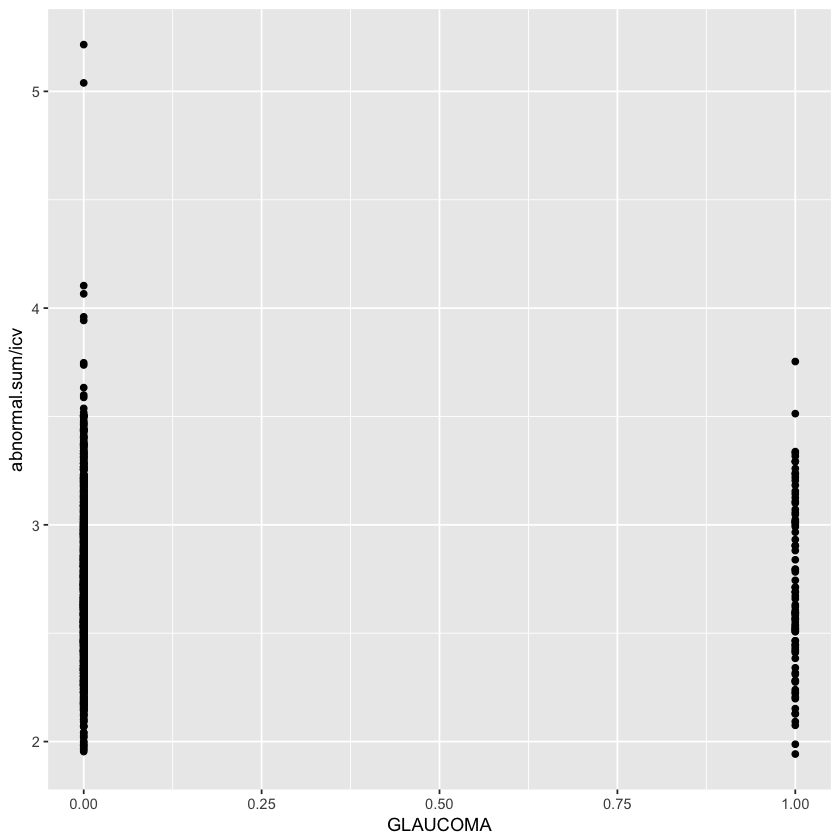

In [31]:
library(ggplot2)
ggplot(data=data.merged) +
geom_point(aes(x=GLAUCOMA, y=abnormal.sum/icv))

In [33]:
lm.fit2 <- lm.fit(inferior_occipital_gyrus_left.x ~ GLAUCOMA, data=data.merged)

ERROR: Error in lm.fit(inferior_occipital_gyrus_left.x ~ GLAUCOMA, data = data.merged): 'x' must be a matrix


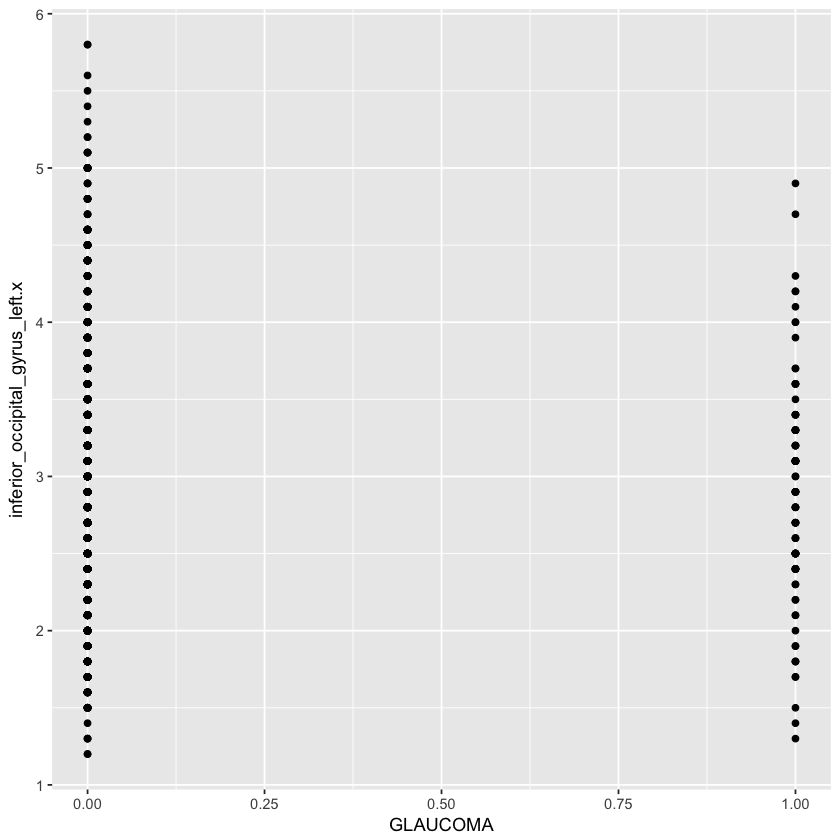

In [44]:
library(ggplot2)
ggplot(data=data.merged) +
geom_point(aes(x=GLAUCOMA, y=inferior_occipital_gyrus_left.x))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


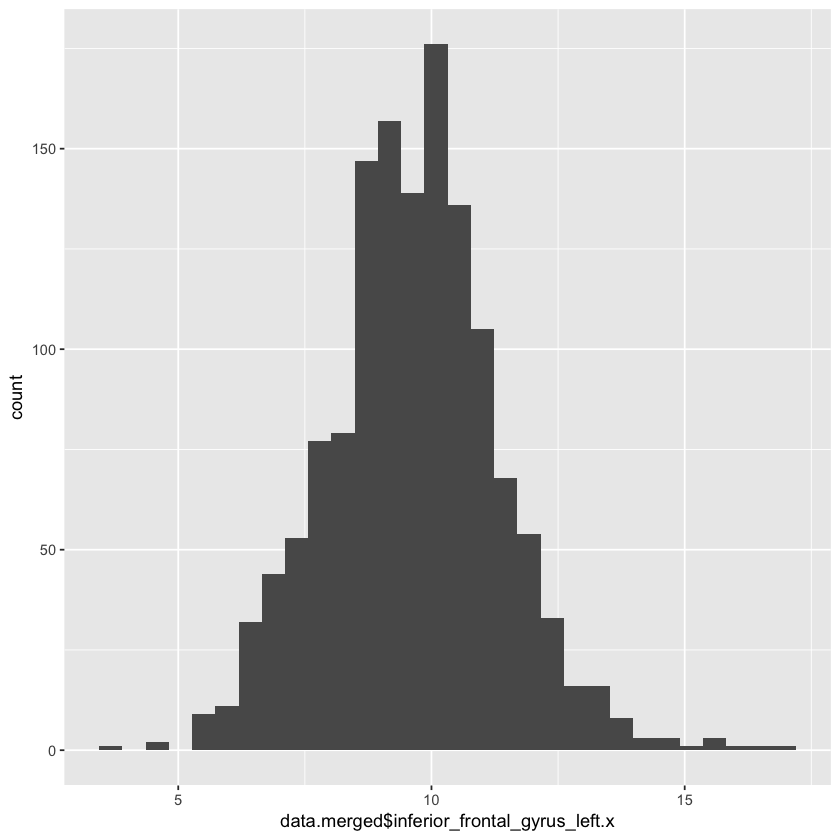

In [42]:
ggplot() + 
geom_histogram(aes(x=data.merged$inferior_frontal_gyrus_left.x))

In [53]:
table(data.merged$occipital_lobe_WM_right.x)


 5.3   12 12.4 12.6 12.9 13.7 13.8 13.9 14.6 15.2 15.6 15.7 15.9   16 16.1 16.4 
   1    1    2    1    1    1    1    1    2    1    1    2    1    1    2    1 
16.5 16.6 16.7 16.8 16.9   17 17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9   18 
   2    1    1    4    5    3    1    8    4    2    5    7    3    3    3    8 
18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9   19 19.1 19.2 19.3 19.4 19.5 19.6 
   5    5    4    6    9    9    9    4    5    9    6   10   14   10    6    9 
19.7 19.8 19.9   20 20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9   21 21.1 21.2 
  12    7   15   11    9   12    7   12    8   13   12   11   10    9   21    8 
21.3 21.4 21.5 21.6 21.7 21.8 21.9   22 22.1 22.2 22.3 22.4 22.5 22.6 22.7 22.8 
  13   16   14   16   13   13   11   11   11   17   14    9   16   13   10   13 
22.9   23 23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9   24 24.1 24.2 24.3 24.4 
  18   16   10   13   12   17   11   16   15    8   14   14   14    8   11   10 
24.5 24.6 24.7 24.8 24.9   

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


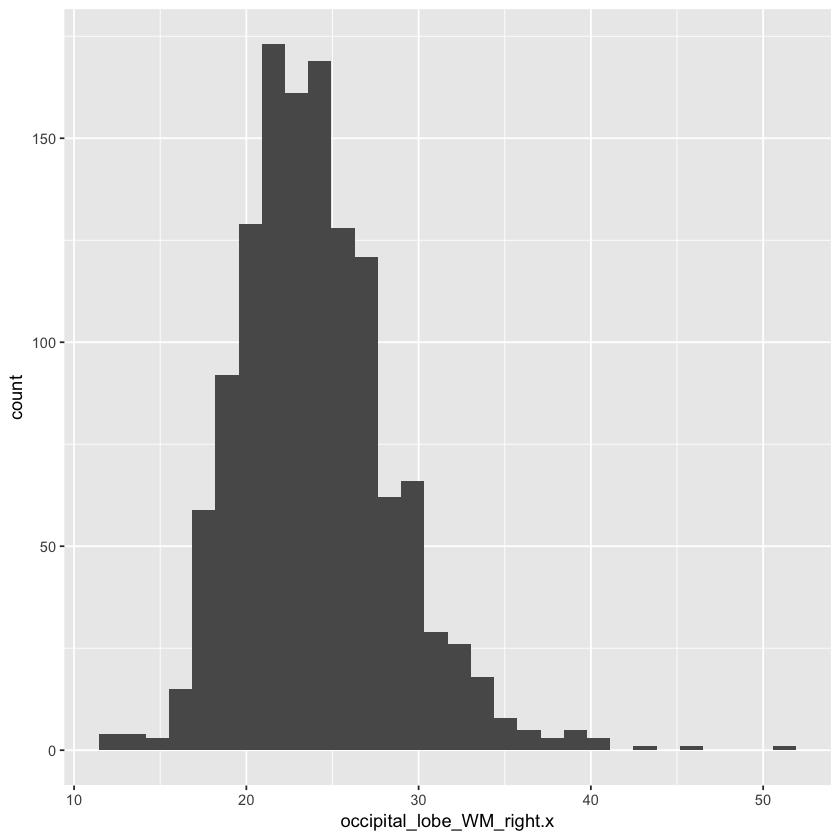

In [54]:
data.merged %>%
filter(GLAUCOMA==0) %>%
ggplot(data=.) + 
geom_histogram(aes(x=occipital_lobe_WM_right.x))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


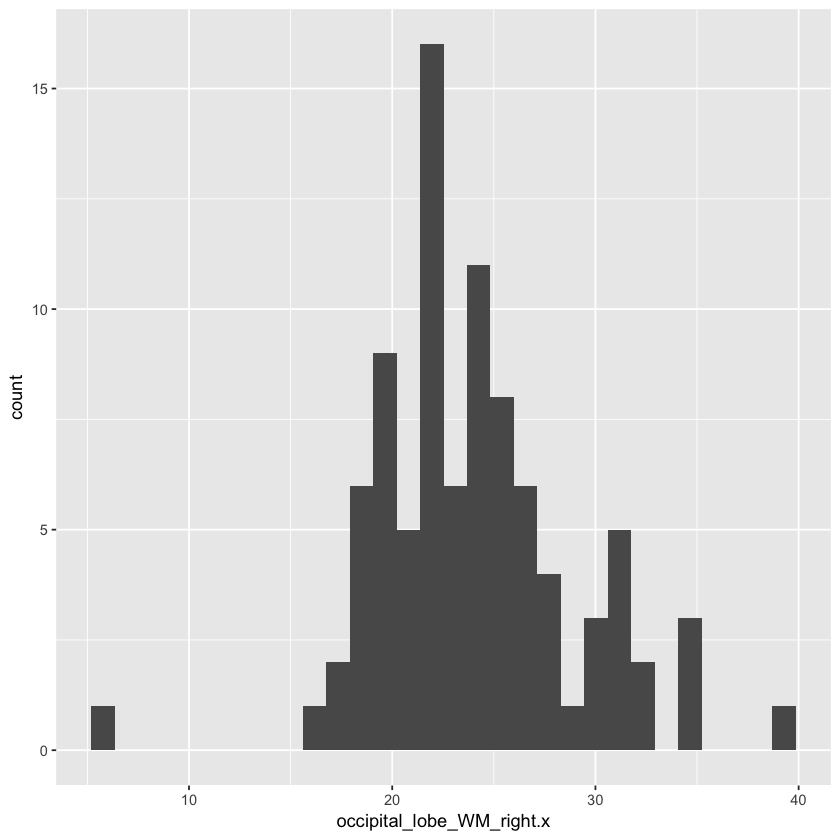

In [55]:
data.merged %>%
filter(GLAUCOMA==1) %>%
ggplot(data=.) + 
geom_histogram(aes(x=occipital_lobe_WM_right.x))

In [56]:
wilcox.test(occipital_lobe_WM_right.x~GLAUCOMA, data=data.merged)


	Wilcoxon rank sum test with continuity correction

data:  occipital_lobe_WM_right.x by GLAUCOMA
W = 58358, p-value = 0.8935
alternative hypothesis: true location shift is not equal to 0


In [65]:
wilcox.test(thalamus_left.x+thalamus_right.x~GLAUCOMA, data=data.merged)


	Wilcoxon rank sum test with continuity correction

data:  thalamus_left.x + thalamus_right.x by GLAUCOMA
W = 60416, p-value = 0.4849
alternative hypothesis: true location shift is not equal to 0
